In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sktime.forecasting.arch import ARCH
from sktime.utils.plotting import plot_series
from sktime.forecasting.arima import ARIMA, AutoARIMA
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
# временной горизонт для прогнозирования
from sktime.forecasting.base import ForecastingHorizon

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
df = pd.read_excel('C:\\Users\\ф\\Desktop\\vidext.xlsx')
df

,year,market,gdp,esports,esportsrub,subs,usd
0,2016,91,85616.1,35.4,2.371850,NaN,67.0014
1,2017,94,91843.2,38.0,2.217095,NaN,58.3446
2,2018,101,103861.7,45.0,2.823363,NaN,62.7414
3,2019,121,109608.3,51.7,3.345791,NaN,64.7155
4,2020,163,107658.2,65.0,4.691642,NaN,72.1791
5,2021,178,135773.8,80.0,5.892416,NaN,73.6552
6,2022,168,155350.4,93.0,6.374090,1.0,68.5386
7,2023,176,171041.0,100.0,8.529970,0.8,85.2997
8,2024,187,201152.1,NaN,NaN,NaN,92.6225


# year - год
# market - общий объём рынка видеоигр в России, млрд руб
# gdp - ВВП России в текущих ценах, млрд руб
# esportsrub - объём рынка киберспорта в России, млрд руб
# subs - объём грантов от ИРИ в России, млрд руб
# usd - среднегодовой курс доллара согласно ЦБ РФ

<Axes: xlabel='gdp', ylabel='market'>

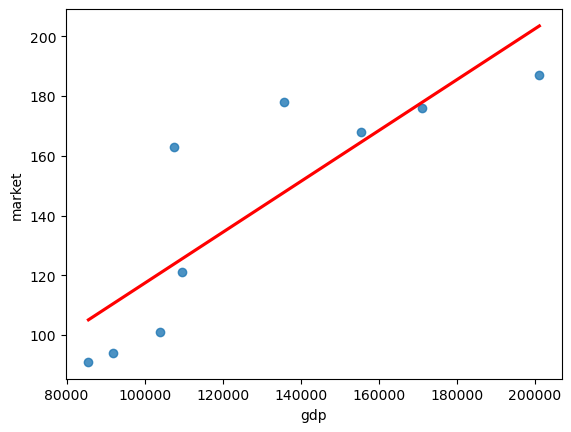

In [3]:
sns.regplot(data=df, x='gdp', y='market', ci=None, line_kws={"color": "r"})

In [8]:
fitted_line = smf.ols(formula='np.log(market)~np.log(gdp)', data=df).fit()
fitted_line.params.round(2)

Intercept     -5.45
np.log(gdp)    0.88
dtype: float64

$$
log(market) = -5.45+0.88*log(gdp)
$$

При увеличении ВВП на 1% рынок видеоигр в России увеличивается на 0,88%

In [10]:
fitted_line = smf.ols(formula='np.log(gdp)~np.log(market)', data=df).fit()
fitted_line.params.round(2)

Intercept         7.55
np.log(market)    0.85
dtype: float64

$$
log(gdp) = 7.55+0.85*log(market)
$$

При увеличении рынка видеоигр на 1% ВВП России увеличивается на 0,85%

In [12]:
fitted_line = smf.ols(formula='np.log(market)~np.log(esportsrub)', data=df).fit()
fitted_line.params.round(2)

Intercept             4.09
np.log(esportsrub)    0.57
dtype: float64

$$
log(market) = 4.09+0.57*log(esportsrub)
$$

При увеличении рынка киберспорта на 1% рынок видеоигр в России увеличивается на 0,57%

In [15]:
fitted_line = smf.ols(formula='np.log(esportsrub)~np.log(market)', data=df).fit()
fitted_line.params.round(2)

Intercept        -6.50
np.log(market)    1.62
dtype: float64

$$
log(esportsrub) = -6.50+1.62*log(market)
$$

При увеличении рынка видеоигр на 1% рынок киберспорта в России увеличивается на 1,62%